In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1i4ngIJLTNMpNz-BN1f1WG1-qRghPBm5QRnHhcC0i22o',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'custommodeldeployment-donotdelete-pr-ajpde8qafngmeb'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission_df = data.drop('Serial No.', axis=1) 
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Visualization

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

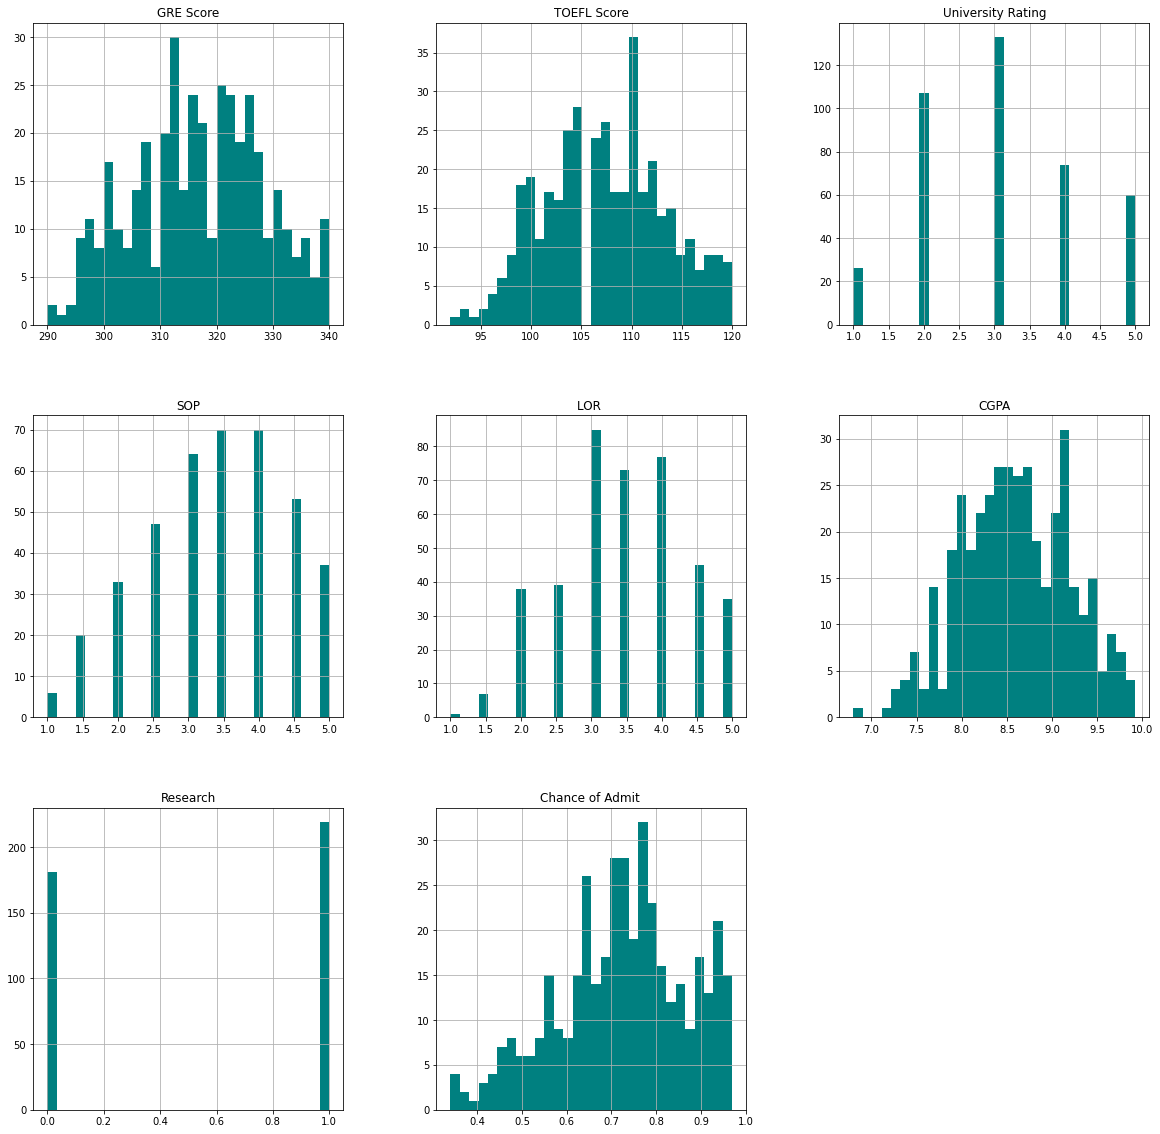

In [9]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'teal')

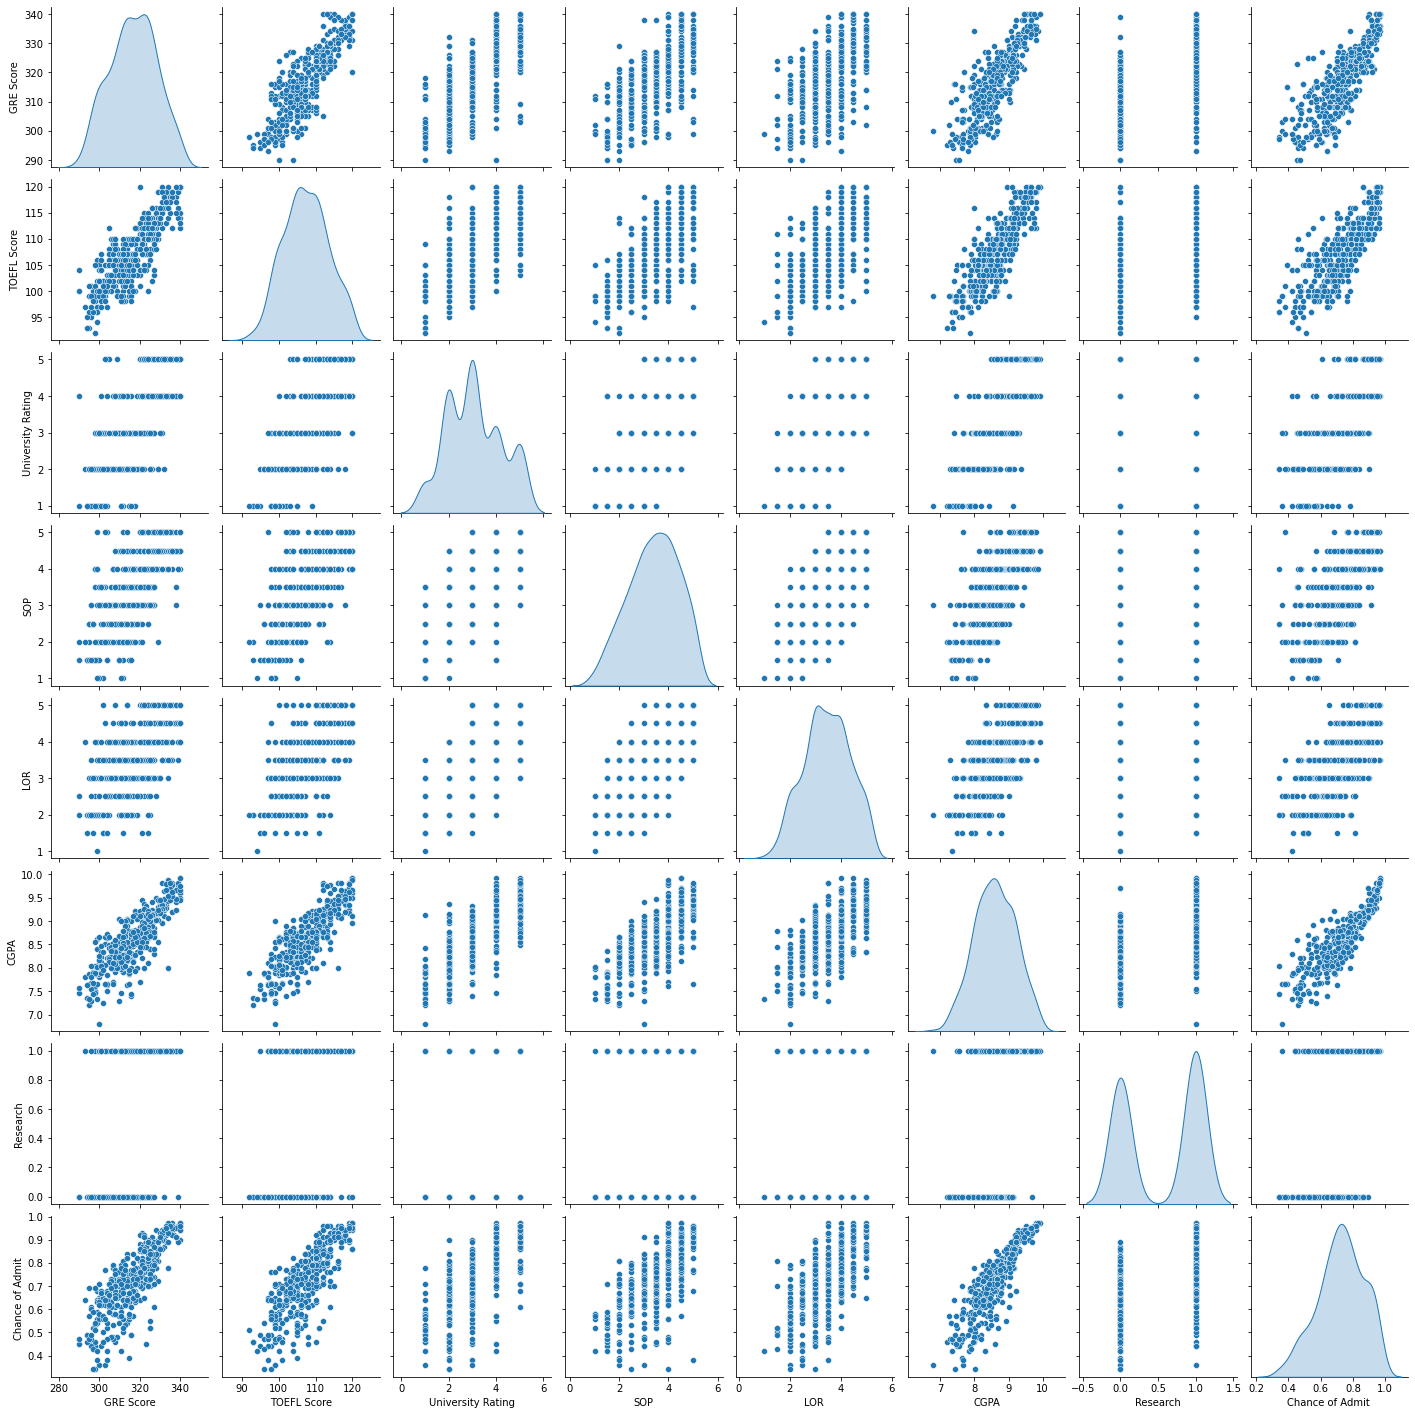

In [10]:
sns.pairplot(admission_df, diag_kind="kde")

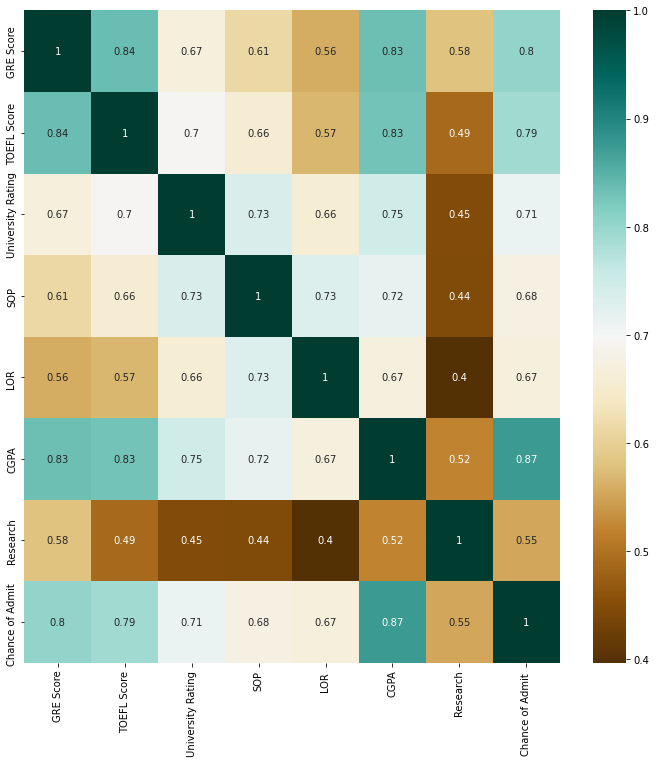

In [11]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, cmap= "BrBG")
plt.show()

Creating Training and Testing Datasets

In [12]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
X = admission_df.drop(columns =['Chance of Admit '])
y = admission_df['Chance of Admit ']

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
y = y.reshape(-1,1)
y.shape

(400, 1)

Scaling Data

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=42)

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

## Accuracy
DecisionTree_accuracy = DecisionTree_model.score(X_test, y_test)
print("Decision Tree model accuracy: {:.2f} %".format(DecisionTree_accuracy*100))

Decision Tree model accuracy: 61.33 %


Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

## Accuracy
RandomForest_accuracy = RandomForest_model.score(X_test, y_test)
print("Random Forest model accuracy: {:.2f} %".format(RandomForest_accuracy*100))

Random Forest model accuracy: 80.74 %


/tmp/wsuser/ipykernel_165/855598693.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

## Accuracy
LinearRegression_accuracy = LinearRegression_model.score(X_test, y_test)
print("Linear Regression model accuracy: {:.2f} %".format(LinearRegression_accuracy*100))

Linear Regression model accuracy: 81.03 %


In [21]:
dict = {DecisionTree_accuracy : 'Decision Tree', RandomForest_accuracy : 'Random Forest', LinearRegression_accuracy : 'Linear Regression'}
print('The model with highest accuarcy is:',dict.get(max(dict)))

The model with highest accuarcy is: Linear Regression


Regression Model KPIs

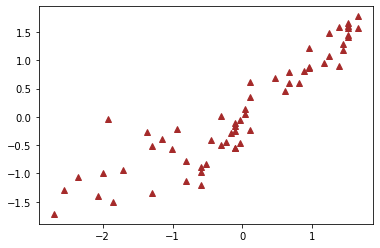

In [22]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'brown')

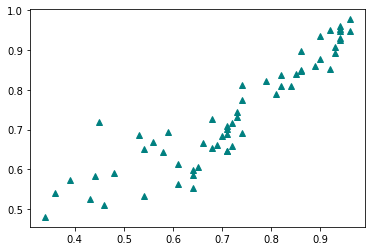

In [23]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'teal')

In [24]:
k = X_test.shape[1]
n = len(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE  = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_R2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE= ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2 = ', r2, '\nAdjusted R2 = ', adj_R2)

RMSE=  0.073 
MSE =  0.00539668727331677 
MAE =  0.05074813528312517 
R2 =  0.8102830881910719 
Adjusted R2 =  0.7847442731398699


Predicting on New Data

In [26]:
student_1 = np.array([340,120,3,3,3,9.8,1], ndmin=2)
student_2 = np.array([300,100,4,3,3,8.5,1], ndmin=2)
student_3 = np.array([290,100,3,4,4,7,0], ndmin=2)

prediction_1 = LinearRegression_model.predict(student_1)
prediction_2 = LinearRegression_model.predict(student_2)
prediction_3 = LinearRegression_model.predict(student_3)

print ("Possibility for student_1 is: {:.2f} %".format(int(prediction_1)))
print ("Possibility for student_2 is: {:.2f} %".format(int(prediction_2)))
print ("Possibility for student_3 is: {:.2f} %".format(int(prediction_3)))

Possibility for student_1 is: 70.00 %
Possibility for student_2 is: 61.00 %
Possibility for student_3 is: 59.00 %


# IBM DEPLOYMENT

In [27]:
!pip install -U ibm-watson-machine-learning

In [28]:
from ibm_watson_machine_learning import APIClient
import json

## Authentication and Set Space

In [29]:
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "5krRUFWdHgYbO4G9dm85TYoeeTlXRfJtTPcF5wo6ZrPF"
}

In [45]:
wml_client =APIClient(wml_credentials)

In [47]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------------  ------------------------
ID                                    NAME                     CREATED
a3c38162-5ff9-4705-bde4-dd2b8339b8f7  Custom Model Deployment  2022-11-18T14:03:09.302Z
------------------------------------  -----------------------  ------------------------


In [48]:
SPACE_ID="a3c38162-5ff9-4705-bde4-dd2b8339b8f7"

In [49]:
 wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [50]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

## Save and Deploy the model

In [51]:
import sklearn
sklearn.__version__

'1.0.2'

In [90]:
MODEL_NAME = 'Model'
DEPLOYMENT_NAME = 'Custom Model Deployment'
DEMO_MODEL = LinearRegression_model

In [56]:
#Set Python Version
software_spec_uid = wml_client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")

In [57]:
# Setup model meta
model_props={
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [80]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=X_train,
    training_target=y_train
)

In [81]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'l0',
  'schemas': {'input': [{'fields': [{'name': 'f0', 'type': 'float'},
      {'name': 'f1', 'type': 'float'},
      {'name': 'f2', 'type': 'float'},
      {'name': 'f3', 'type': 'float'},
      {'name': 'f4', 'type': 'float'},
      {'name': 'f5', 'type': 'float'},
      {'name': 'f6', 'type': 'float'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T15:17:32.442Z',
  'id': '6a60aa41-8413-4b07-87b2-7e0a7e850511',
  'modified_at': '2022-11-18T15:17:35.106Z',
  'name': 'Custom Model Deployment',
  'owner': 'IBMid-6620043X2S',
  'resource_key': '11886b2d-e452-49d3-bd45-d8a3d4ce26fb',
  'space_id': 'a3c38162-5ff9-4705-bde4-dd2b8339b8f7'},
 'system': {'warnings': []}}

In [82]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'6a60aa41-8413-4b07-87b2-7e0a7e850511'

In [91]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [92]:
#Deploy
deployment = wml_client.deployments.create(
     artifact_uid=model_id,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '6a60aa41-8413-4b07-87b2-7e0a7e850511' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='776e4e48-19ec-4dc8-81b8-333f4fc115d6'
------------------------------------------------------------------------------------------------


